<a href="https://colab.research.google.com/github/thapaSujit/ai-finance/blob/main/Assignment_B_sentiment_analysis_on_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries


In [1]:
#Importing necessary libraries
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping

# Accessing and Exploring the Training Data

In [2]:
#Reading train data
trainData = pd.read_csv("/content/train.tsv",sep = '\t')
trainData.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [3]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [4]:
trainData.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


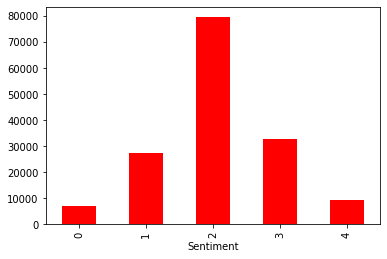

In [5]:
trainData.groupby("Sentiment").Sentiment.count().plot.bar(ylim=0, color = 'red')

# Text Preprocessing

In [6]:
#Converting all the phrase in train data to lowercase
trainDataUpd = trainData['Phrase'].str.lower()
print(trainDataUpd)

0         a series of escapades demonstrating the adage ...
1         a series of escapades demonstrating the adage ...
2                                                  a series
3                                                         a
4                                                    series
                                ...                        
156055                                            hearst 's
156056                            forced avuncular chortles
156057                                   avuncular chortles
156058                                            avuncular
156059                                             chortles
Name: Phrase, Length: 156060, dtype: object


In [7]:
#Tokkenizing the phrase in train data into words and removing the punctuations
tokenizer = nltk.RegexpTokenizer(r'\w+')
tokenizedPhraseTD = trainDataUpd.apply(lambda x: tokenizer.tokenize(x))
print(tokenizedPhraseTD)

0         [a, series, of, escapades, demonstrating, the,...
1         [a, series, of, escapades, demonstrating, the,...
2                                               [a, series]
3                                                       [a]
4                                                  [series]
                                ...                        
156055                                          [hearst, s]
156056                        [forced, avuncular, chortles]
156057                                [avuncular, chortles]
156058                                          [avuncular]
156059                                           [chortles]
Name: Phrase, Length: 156060, dtype: object


In [8]:
#Removing stop words
nltk.download('stopwords')
stopWords = stopwords.words('english')
SWremovalPTD = tokenizedPhraseTD.apply(lambda x: [item for item in x if item not in stopWords])
print(SWremovalPTD)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0         [series, escapades, demonstrating, adage, good...
1         [series, escapades, demonstrating, adage, good...
2                                                  [series]
3                                                        []
4                                                  [series]
                                ...                        
156055                                             [hearst]
156056                        [forced, avuncular, chortles]
156057                                [avuncular, chortles]
156058                                          [avuncular]
156059                                           [chortles]
Name: Phrase, Length: 156060, dtype: object


In [9]:
#Stemming the phrase
#Stemming is the process of producing morphological variants of a root/base word. Stemming programs are 
#commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”,
#“chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the 
#stem “retrieve”.
stemmer = PorterStemmer()
stemmedPhraseTD = SWremovalPTD.apply(lambda x: [stemmer.stem(i) for i in x])
print(stemmedPhraseTD)

0         [seri, escapad, demonstr, adag, good, goos, al...
1               [seri, escapad, demonstr, adag, good, goos]
2                                                    [seri]
3                                                        []
4                                                    [seri]
                                ...                        
156055                                             [hearst]
156056                            [forc, avuncular, chortl]
156057                                  [avuncular, chortl]
156058                                          [avuncular]
156059                                             [chortl]
Name: Phrase, Length: 156060, dtype: object


In [10]:
nltk.download('wordnet')
nltk.download('omw-1.4')
#Lemmatizing the phrase
#Lemmatization is the process of grouping together the different inflected forms of a word so they can be 
#analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. 
lemmatizer = WordNetLemmatizer()
lemmatizedPhraseTD = SWremovalPTD.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
print(lemmatizedPhraseTD)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0         [series, escapade, demonstrating, adage, good,...
1         [series, escapade, demonstrating, adage, good,...
2                                                  [series]
3                                                        []
4                                                  [series]
                                ...                        
156055                                             [hearst]
156056                         [forced, avuncular, chortle]
156057                                 [avuncular, chortle]
156058                                          [avuncular]
156059                                            [chortle]
Name: Phrase, Length: 156060, dtype: object


In [11]:
#Creating a new column in the train data consisting of stemmed phrase
for i in range(len(stemmedPhraseTD)):
    stemmedPhraseTD[i] = ' '.join(stemmedPhraseTD[i])

trainData['stemmedPhraseTD'] = stemmedPhraseTD
trainData.rename(columns = {'stemmedPhraseTD':'stemmedPhrase'}, inplace = True)
print(trainData['stemmedPhrase'])

0         seri escapad demonstr adag good goos also good...
1                      seri escapad demonstr adag good goos
2                                                      seri
3                                                          
4                                                      seri
                                ...                        
156055                                               hearst
156056                                forc avuncular chortl
156057                                     avuncular chortl
156058                                            avuncular
156059                                               chortl
Name: stemmedPhrase, Length: 156060, dtype: object


In [12]:
#Creating a new column in the train data consisting of lemmatized phrase
for i in range(len(lemmatizedPhraseTD)):
    lemmatizedPhraseTD[i] = ' '.join(lemmatizedPhraseTD[i])

trainData['lemmatizedPhraseTD'] = lemmatizedPhraseTD
trainData.rename(columns = {'lemmatizedPhraseTD':'lemmatizedPhrase'}, inplace = True)
print(trainData['lemmatizedPhrase'])

0         series escapade demonstrating adage good goose...
1            series escapade demonstrating adage good goose
2                                                    series
3                                                          
4                                                    series
                                ...                        
156055                                               hearst
156056                             forced avuncular chortle
156057                                    avuncular chortle
156058                                            avuncular
156059                                              chortle
Name: lemmatizedPhrase, Length: 156060, dtype: object


In [13]:
trainData.head()

,PhraseId,SentenceId,Phrase,Sentiment,stemmedPhrase,lemmatizedPhrase
0,1,1,A series of escapades demonstrating the adage ...,1,seri escapad demonstr adag good goos also good...,series escapade demonstrating adage good goose...
1,2,1,A series of escapades demonstrating the adage ...,2,seri escapad demonstr adag good goos,series escapade demonstrating adage good goose
2,3,1,A series,2,seri,series
3,4,1,A,2,,
4,5,1,series,2,seri,series


In [14]:
#Removing empty rows
trainData = trainData[trainData["stemmedPhrase"] != '']
trainData = trainData[trainData["lemmatizedPhrase"] != '']

In [15]:
trainData.head()

,PhraseId,SentenceId,Phrase,Sentiment,stemmedPhrase,lemmatizedPhrase
0,1,1,A series of escapades demonstrating the adage ...,1,seri escapad demonstr adag good goos also good...,series escapade demonstrating adage good goose...
1,2,1,A series of escapades demonstrating the adage ...,2,seri escapad demonstr adag good goos,series escapade demonstrating adage good goose
2,3,1,A series,2,seri,series
4,5,1,series,2,seri,series
5,6,1,of escapades demonstrating the adage that what...,2,escapad demonstr adag good goos,escapade demonstrating adage good goose


In [16]:
print("*****************************************NORMAL********************************************")
print(trainData['Phrase'][0])

print("\n***********************************AFTER STEMMING******************************************")
print(trainData['stemmedPhrase'][0])

print("\n***********************************AFTER LEMMATIZING******************************************")
print(trainData['lemmatizedPhrase'][0])

*****************************************NORMAL********************************************
A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .

***********************************AFTER STEMMING******************************************
seri escapad demonstr adag good goos also good gander occasion amus none amount much stori

***********************************AFTER LEMMATIZING******************************************
series escapade demonstrating adage good goose also good gander occasionally amuses none amount much story


# Word Clouds

In [ ]:
#Function for creating the set of words that results in positive, negative or neureal sentiment
def wordSet(phrase, sentiment):
    words = []
    for i in phrase[phrase['Sentiment'] == sentiment]['stemmedPhrase'].str.split():
        for j in i:
            words.append(j)
    return words

In [ ]:
#Set of positive, negative and neutral sentiment
negativeWord = wordSet(trainData,0)
somewhatNegWord = wordSet(trainData,1)
neutral = wordSet(trainData,2)
somewhatposWord = wordSet(trainData,3)
positiveWord = wordSet(trainData,4)

In [ ]:
#Merging two lists i.e. negativeWord and somewhatNegWord
for i in somewhatNegWord :
    negativeWord.append(i)

In [ ]:
#Merging two lists i.e. poWord and somewhatNposWord
for i in somewhatposWord :
    positiveWord.append(i)

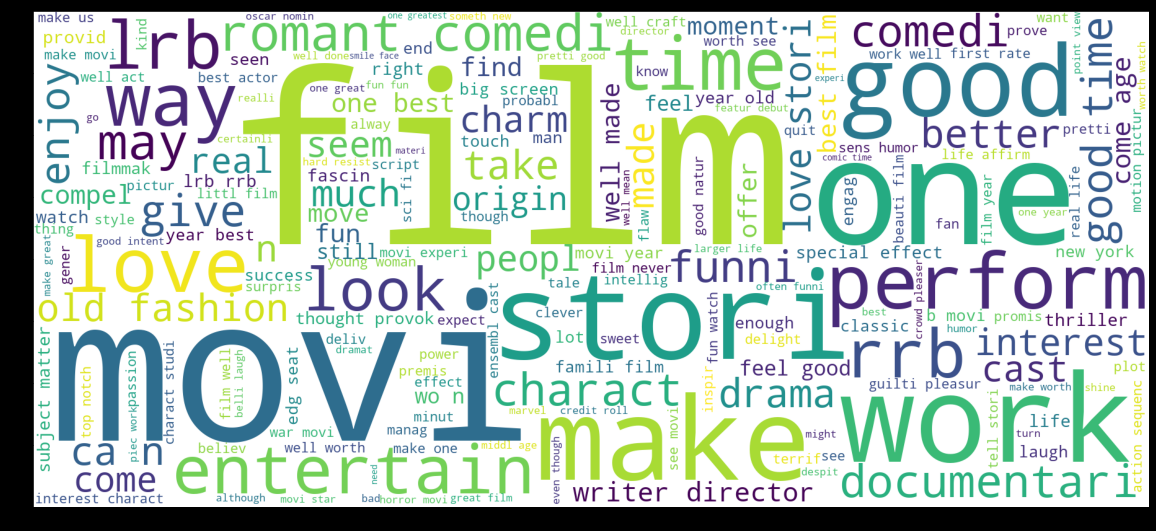

In [ ]:
#Creating word cloud figure for the positive words
posWordFigure = WordCloud(background_color="white", width=1800, height=800).generate(' '.join(positiveWord))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(posWordFigure)

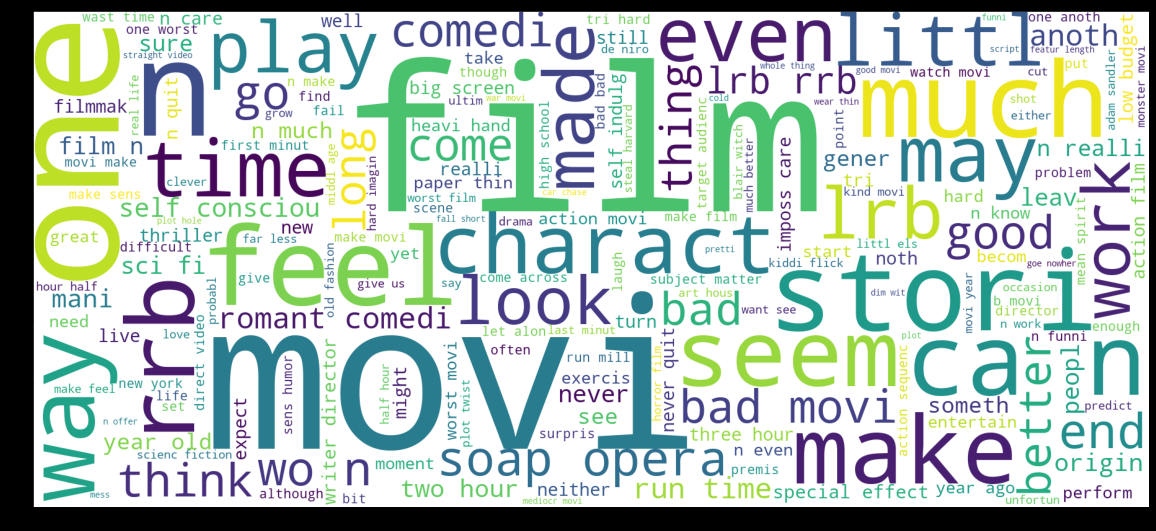

In [ ]:
#Creating word cloud figure for the negative words
negWordFigure = WordCloud(background_color="white", width=1800, height=800).generate(' '.join(negativeWord))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(negWordFigure)

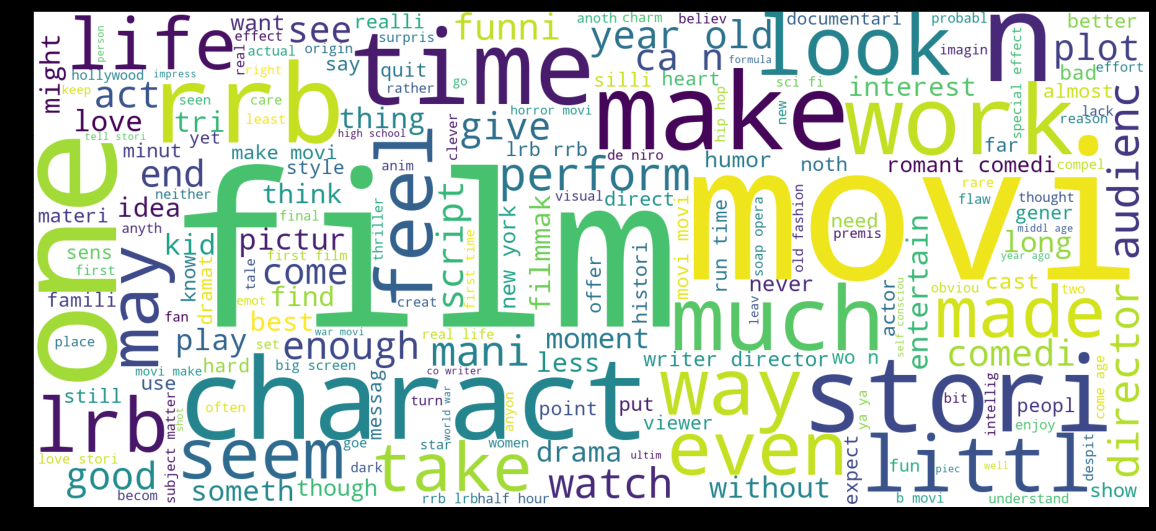

In [ ]:
#Creating word cloud figure for the neutral words
neutralWordFigure = WordCloud(background_color="white", width=1800, height=800).generate(' '.join(neutral))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(neutralWordFigure)

#Applying Various Machine Learning Algorithms 

## Using Stemmed Phrase

**Using Stemmed Phrase for Training Using Various Machine Learning Algorithms and calculating the different measure to test the model**

In [ ]:
#Defining the columns to be used for training
phraseStemmed = trainData['stemmedPhrase']
sentimentStemmed = trainData['Sentiment']
phraseStemmed.head()

0    seri escapad demonstr adag good goos also good...
1                 seri escapad demonstr adag good goos
2                                                 seri
4                                                 seri
5                      escapad demonstr adag good goos
Name: stemmedPhrase, dtype: object

In [ ]:
#Spltting the train dataset into train and test dataset
xTrainStem,xTestStem,yTrainStem,yTestStem = train_test_split(phraseStemmed, sentimentStemmed, test_size=0.2, random_state=60)

print(len(xTrainStem))
print(len(xTestStem))

123903
30976


### Naive Bayes

In [ ]:
#Training the classifier with  Naive Bayes using stemmed phrase from training data and predicting on the test data, 
#then calculating the accuracy

pipeLineNBStem = Pipeline([
        ('bow', CountVectorizer(analyzer="word")),
               ('clf', MultinomialNB()),
              ])

pipeLineNBStem.fit(xTrainStem,yTrainStem)
testPredictNB = pipeLineNBStem.predict(xTestStem)
trainAccuracyNB = round(pipeLineNBStem.score(xTrainStem,yTrainStem)*100)
testAccuracyNB =round(accuracy_score(testPredictNB, yTestStem)*100)

print("Using Stemmed Phrase From original Training DataSet")
print("Naive Bayes Train Accuracy Score : {}% ".format(trainAccuracyNB))
print("Naive Bayes Test Accuracy Score  : {}% ".format(testAccuracyNB))
print(classification_report(testPredictNB, yTestStem))

Using Stemmed Phrase From original Training DataSet
Naive Bayes Train Accuracy Score : 66% 
Naive Bayes Test Accuracy Score  : 60% 
              precision    recall  f1-score   support

           0       0.27      0.44      0.33       841
           1       0.40      0.50      0.44      4292
           2       0.80      0.67      0.73     18662
           3       0.48      0.51      0.49      6169
           4       0.25      0.50      0.34      1012

    accuracy                           0.60     30976
   macro avg       0.44      0.52      0.47     30976
weighted avg       0.65      0.60      0.62     30976



### Support Vector Machines

In [ ]:
#Training the classifier with  SVM using stemmed phrase from training data and predicting on the test data, 
#then calculating the accuracy

pipeLineSVMStem = Pipeline([
    ('bow', CountVectorizer(analyzer="word")),
                ('clf', svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')),
               ])

pipeLineSVMStem.fit(xTrainStem,yTrainStem)

testPredictSVM = pipeLineSVMStem.predict(xTestStem)

trainAccuracySVM = round(pipeLineSVMStem.score(xTrainStem,yTrainStem)*100)
testAccuracySVM =round(accuracy_score(testPredictSVM, yTestStem)*100)

print("Using Stemmed Phrase From original Training DataSet")
print("SVM Train Accuracy Score : {}% ".format(trainAccuracySVM))
print("SVM Test Accuracy Score  : {}% ".format(testAccuracySVM))
print()
print(classification_report(testPredictSVM, yTestStem))

Using Stemmed Phrase From original Training DataSet
SVM Train Accuracy Score : 70% 
SVM Test Accuracy Score  : 64% 

              precision    recall  f1-score   support

           0       0.31      0.49      0.38       878
           1       0.44      0.53      0.48      4496
           2       0.84      0.70      0.76     18757
           3       0.49      0.55      0.52      5802
           4       0.31      0.60      0.41      1043

    accuracy                           0.64     30976
   macro avg       0.48      0.57      0.51     30976
weighted avg       0.68      0.64      0.65     30976



### Decision Tree

In [ ]:
#Training the classifier with  DT using stemmed phrase from training data and predicting on the test data, 
#then calculating the accuracy
pipeLineDTStem = Pipeline([('bow', CountVectorizer(analyzer="word")),
                ('dt', DecisionTreeClassifier()),
               ])

pipeLineDTStem.fit(xTrainStem, yTrainStem)
testPredictDT = pipeLineDTStem.predict(xTestStem)
trainAccuracyDT = round(pipeLineDTStem.score(xTrainStem,yTrainStem)*100)
testAccuracyDT =round(accuracy_score(testPredictDT, yTestStem)*100)

print("Using Stemmed Phrase From original Training DataSet")
print("Decision Tree Train Accuracy Score : {}% ".format(trainAccuracyDT))
print("Decision Tree Test Accuracy Score  : {}% ".format(testAccuracyDT))
print(classification_report(testPredictDT, yTestStem))

Using Stemmed Phrase From original Training DataSet
Decision Tree Train Accuracy Score : 86% 
Decision Tree Test Accuracy Score  : 62% 
              precision    recall  f1-score   support

           0       0.44      0.41      0.43      1504
           1       0.52      0.51      0.52      5578
           2       0.77      0.72      0.74     16549
           3       0.49      0.54      0.51      5940
           4       0.37      0.52      0.43      1405

    accuracy                           0.62     30976
   macro avg       0.52      0.54      0.53     30976
weighted avg       0.64      0.62      0.63     30976



### K-Nearest Neighbour

In [ ]:
#Training the classifier with  KNN using stemmed phrase from training data and predicting on the test data, 
#then calculating the accuracy

pipeLineKNNStem = Pipeline([('bow', CountVectorizer(analyzer="word")),
                ('knn', KNeighborsClassifier(n_neighbors=5, metric='euclidean')),
               ])

pipeLineKNNStem.fit(xTrainStem, yTrainStem)
testPredictKNN = pipeLineKNNStem.predict(xTestStem)
trainAccuracyKNN = round(pipeLineKNNStem.score(xTrainStem,yTrainStem)*100)
testAccuracyKNN =round(accuracy_score(testPredictKNN, yTestStem)*100)

print("Using Stemmed Phrase From original Training DataSet")
print("K-Nearest Neighbour Train Accuracy Score : {}% ".format(trainAccuracyKNN))
print("K-Nearest Neighbour Test Accuracy Score  : {}% ".format(testAccuracyKNN))
print(classification_report(testPredictKNN, yTestStem))

Using Stemmed Phrase From original Training DataSet
K-Nearest Neighbour Train Accuracy Score : 72% 
K-Nearest Neighbour Test Accuracy Score  : 61% 
              precision    recall  f1-score   support

           0       0.32      0.45      0.38       994
           1       0.40      0.53      0.46      4160
           2       0.87      0.65      0.74     20829
           3       0.36      0.57      0.45      4217
           4       0.24      0.60      0.34       776

    accuracy                           0.61     30976
   macro avg       0.44      0.56      0.47     30976
weighted avg       0.70      0.61      0.64     30976



## Using Lemmatized Phrase

**Using Lemmatized Phrase for Training Using Various Machine Learning Algorithms and calculating the different measure to test the model**

In [ ]:
#Defining the columns to be used for training
phraseLemmatized = trainData['lemmatizedPhrase']
sentimentLemmatized = trainData['Sentiment']
phraseLemmatized.head()

0    series escapade demonstrating adage good goose...
1       series escapade demonstrating adage good goose
2                                               series
4                                               series
5              escapade demonstrating adage good goose
Name: lemmatizedPhrase, dtype: object

In [ ]:
#Spltting the train dataset into train and test dataset
xTrainLem,xTestLem,yTrainLem,yTestLem = train_test_split(phraseLemmatized, sentimentLemmatized, test_size=0.2, random_state=60)

print(len(xTrainStem))
print(len(xTestStem))

123903
30976


### New Naive Bayes

In [ ]:
#Training the classifier with  Naive Bayes using lemmatized phrase from training 
#data and predicting on the test data, then calculating the accuracy

pipeLineNBLem = Pipeline([
        ('bow', CountVectorizer(analyzer="word")),
               ('clf', MultinomialNB()),
              ])

pipeLineNBLem.fit(xTrainLem,yTrainLem)
testPredictNB = pipeLineNBLem.predict(xTestLem)
trainAccuracyNB = round(pipeLineNBLem.score(xTrainLem,yTrainLem)*100)
testAccuracyNB =round(accuracy_score(testPredictNB, yTestLem)*100)

print("Using Lemmatized Phrase From original Training DataSet")
print("Naive Bayes Train Accuracy Score : {}% ".format(trainAccuracyNB))
print("Naive Bayes Test Accuracy Score  : {}% ".format(testAccuracyNB))
print(classification_report(testPredictNB, yTestLem))

Using Lemmatized Phrase From original Training DataSet
Naive Bayes Train Accuracy Score : 67% 
Naive Bayes Test Accuracy Score  : 60% 
              precision    recall  f1-score   support

           0       0.29      0.44      0.35       932
           1       0.41      0.50      0.45      4494
           2       0.79      0.68      0.73     18114
           3       0.49      0.51      0.50      6284
           4       0.29      0.50      0.37      1152

    accuracy                           0.60     30976
   macro avg       0.45      0.52      0.48     30976
weighted avg       0.64      0.60      0.62     30976



### Support Vector Machine

In [ ]:
#Training the classifier with  SVM using lemmatized phrase from training 
#data and predicting on the test data, then calculating the accuracy

pipeLineSVMLem = Pipeline([
    ('bow', CountVectorizer(analyzer="word")),
                ('clf', svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')),
               ])

pipeLineSVMLem.fit(xTrainLem,yTrainLem)

testPredictSVM = pipeLineSVMLem.predict(xTestLem)

trainAccuracySVM = round(pipeLineSVMLem.score(xTrainLem,yTrainLem)*100)
testAccuracySVM =round(accuracy_score(testPredictSVM, yTestLem)*100)

print("Using Lemmatized Phrase From original Training DataSet")
print("SVM Train Accuracy Score : {}% ".format(trainAccuracySVM))
print("SVM Test Accuracy Score  : {}% ".format(testAccuracySVM))
print(classification_report(testPredictSVM, yTestLem))

### Decision Tree

In [ ]:
#Training the classifier with  DT using lemmatized phrase from training 
#data and predicting on the test data, then calculating the accuracy
pipeLineDTLem = Pipeline([('bow', CountVectorizer(analyzer="word")),
                ('dt', DecisionTreeClassifier()),
               ])

pipeLineDTLem.fit(xTrainLem, yTrainLem)
testPredictDT = pipeLineDTLem.predict(xTestLem)
trainAccuracyDT = round(pipeLineDTLem.score(xTrainLem,yTrainLem)*100)
testAccuracyDT =round(accuracy_score(testPredictDT, yTestLem)*100)

print("Using Lemmatized Phrase From original Training DataSet")
print("Decision Tree Train Accuracy Score : {}% ".format(trainAccuracyDT))
print("Decision Tree Test Accuracy Score  : {}% ".format(testAccuracyDT))
print(classification_report(testPredictDT, yTestLem))

### K-Nearest Neighbour

In [ ]:
#Training the classifier with  KNN using lemmatized phrase from training 
#data and predicting on the test data, then calculating the accuracy

pipeLineKNNLem = Pipeline([('bow', CountVectorizer(analyzer="word")),
                ('knn', KNeighborsClassifier(n_neighbors=5, metric='euclidean')),
               ])

pipeLineKNNLem.fit(xTrainLem, yTrainLem)
testPredictKNN = pipeLineKNNLem.predict(xTestLem)
trainAccuracyKNN = round(pipeLineKNNLem.score(xTrainLem,yTrainLem)*100)
testAccuracyKNN =round(accuracy_score(testPredictKNN, yTestLem)*100)

print("Using Lemmatized Phrase From original Training DataSet")
print("K-Nearest Neighbour Train Accuracy Score : {}% ".format(trainAccuracyKNN))
print("K-Nearest Neighbour Test Accuracy Score  : {}% ".format(testAccuracyKNN))
print(classification_report(testPredictKNN, yTestLem))

# Applying LSTM

## Using Stemmed Pharase

Applying LSTM using STEMMED AND LEMMATIZED phrase  

In [17]:
#Defining the columns to be used for training THE LSTM(stemmed phrase)
phraseStemmedLSTM = trainData['stemmedPhrase']
sentimentStemmedLSTM = trainData['Sentiment']
phraseStemmedLSTM.head()

0    seri escapad demonstr adag good goos also good...
1                 seri escapad demonstr adag good goos
2                                                 seri
4                                                 seri
5                      escapad demonstr adag good goos
Name: stemmedPhrase, dtype: object

In [18]:
#Spltting the train dataset into train and validation dataset for stemmed phrase
xTrainStemLSTM,xValStemLSTM,yTrainStemLSTM,yValStemLSTM = train_test_split(phraseStemmedLSTM, sentimentStemmedLSTM, test_size=0.2, random_state=60)

print(len(xTrainStemLSTM))
print(len(xValStemLSTM))

123903
30976


In [19]:
#transfer to Keras tonenizer for both stemmed
tokenize = Tokenizer()
tokenize.fit_on_texts(xTrainStemLSTM.values)
xTrainStemLSTM = tokenize.texts_to_sequences(xTrainStemLSTM)
xValStemLSTM = tokenize.texts_to_sequences(xValStemLSTM)

In [20]:
#Padding the tokenized stemmed phrase
xTrainStemLSTM = pad_sequences(xTrainStemLSTM)
xValStemLSTM = pad_sequences(xValStemLSTM)

In [21]:
earlyStopping = EarlyStopping(min_delta=0.001, mode='max', monitor='val_accuracy', patience=2)
callback = [earlyStopping]

In [22]:
#Building model  
EMBEDDING_DIM = 100
modelStem = Sequential()
modelStem.add(Embedding(len(tokenize.word_index)+1, EMBEDDING_DIM))
modelStem.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2 ))
modelStem.add(Dense(10, activation='softmax'))
modelStem.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
mdStem=modelStem.fit(xTrainStemLSTM, yTrainStemLSTM, validation_data=(xValStemLSTM,yValStemLSTM),batch_size=128, epochs=6, verbose=1,callbacks=callback)

Epoch 1/6
968/968 [==============================] - 145s 145ms/step - loss: 1.0292 - accuracy: 0.5884 - val_loss: 0.8944 - val_accuracy: 0.6347
Epoch 2/6
968/968 [==============================] - 132s 137ms/step - loss: 0.8330 - accuracy: 0.6569 - val_loss: 0.8606 - val_accuracy: 0.6485
Epoch 3/6
968/968 [==============================] - 130s 134ms/step - loss: 0.7794 - accuracy: 0.6768 - val_loss: 0.8520 - val_accuracy: 0.6494
Epoch 4/6
968/968 [==============================] - 131s 136ms/step - loss: 0.7380 - accuracy: 0.6912 - val_loss: 0.8427 - val_accuracy: 0.6537
Epoch 5/6
968/968 [==============================] - 128s 132ms/step - loss: 0.7043 - accuracy: 0.7039 - val_loss: 0.8544 - val_accuracy: 0.6561
Epoch 6/6
968/968 [==============================] - 133s 137ms/step - loss: 0.6765 - accuracy: 0.7129 - val_loss: 0.8566 - val_accuracy: 0.6612


In [24]:
scoreStem = modelStem.evaluate(xValStemLSTM,yValStemLSTM, verbose=0)
print('Test loss for LSTM using Stemmed Phrase:', (round(scoreStem[0],4)*100),'%') 
print('Test accuracy for LSTM using Stemmed Phrase:', (round(scoreStem[1],4)*100),'%')

print('LSTM Classification Report(Stemmed Phrase)')
testPredictStemLSTM=np.argmax(modelStem.predict(xValStemLSTM),axis=1)
print(classification_report(testPredictStemLSTM, yValStemLSTM))

Test loss for LSTM using Stemmed Phrase: 85.66 %
Test accuracy for LSTM using Stemmed Phrase: 66.12 %
LSTM Classification Report(Stemmed Phrase)
968/968 [==============================] - 10s 10ms/step
              precision    recall  f1-score   support

           0       0.33      0.54      0.41       846
           1       0.54      0.57      0.56      5212
           2       0.83      0.72      0.77     17843
           3       0.51      0.58      0.55      5798
           4       0.38      0.59      0.47      1277

    accuracy                           0.66     30976
   macro avg       0.52      0.60      0.55     30976
weighted avg       0.69      0.66      0.67     30976



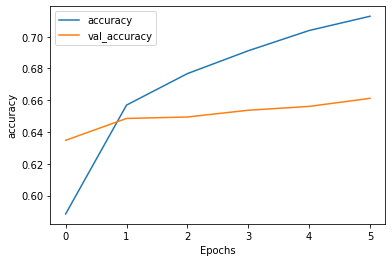

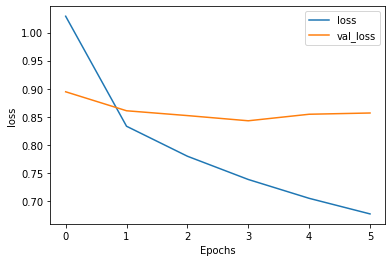

In [25]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(mdStem, 'accuracy')
plot_graphs(mdStem, 'loss')

## Using Lemmanized Phrase

In [26]:
#Defining the columns to be used for training THE LSTM(Lemmatized phrase)
phraseLemmatizedLSTM = trainData['lemmatizedPhrase']
sentimentLemmatizedLSTM = trainData['Sentiment']
phraseLemmatizedLSTM.head()

0    series escapade demonstrating adage good goose...
1       series escapade demonstrating adage good goose
2                                               series
4                                               series
5              escapade demonstrating adage good goose
Name: lemmatizedPhrase, dtype: object

In [27]:
#Spltting the train dataset into train and validation dataset for lemmatized phrase
xTrainLemLSTM,xValLemLSTM,yTrainLemLSTM,yValLemLSTM = train_test_split(phraseLemmatizedLSTM, sentimentLemmatizedLSTM, test_size=0.2, random_state=60)

print(len(xTrainLemLSTM))
print(len(xValLemLSTM))

123903
30976


In [28]:
#transfer to Keras tonenizer for lemmatized phrase
tokenize = Tokenizer()
tokenize.fit_on_texts(xTrainLemLSTM.values)
xTrainLemLSTM=tokenize.texts_to_sequences(xTrainLemLSTM)
xValLemLSTM=tokenize.texts_to_sequences(xValLemLSTM)

In [29]:
#Padding the tokanized lemmanized phrase
xTrainLemLSTM = pad_sequences(xTrainLemLSTM)
xValLemLSTM = pad_sequences(xValLemLSTM)

In [30]:
#Building model  
EMBEDDING_DIM = 100
modelLem = Sequential()
modelLem.add(Embedding(len(tokenize.word_index)+1, EMBEDDING_DIM))
modelLem.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2 ))
modelLem.add(Dense(10, activation='softmax'))
modelLem.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
mdLem=modelLem.fit(xTrainLemLSTM, yTrainLemLSTM, validation_data=(xValLemLSTM,yValLemLSTM),batch_size=128, epochs=6, verbose=1,callbacks=callback)

Epoch 1/6
968/968 [==============================] - 131s 133ms/step - loss: 1.0243 - accuracy: 0.5912 - val_loss: 0.8798 - val_accuracy: 0.6418
Epoch 2/6
968/968 [==============================] - 127s 131ms/step - loss: 0.8146 - accuracy: 0.6647 - val_loss: 0.8561 - val_accuracy: 0.6521
Epoch 3/6
968/968 [==============================] - 128s 132ms/step - loss: 0.7518 - accuracy: 0.6887 - val_loss: 0.8488 - val_accuracy: 0.6528
Epoch 4/6
968/968 [==============================] - 124s 128ms/step - loss: 0.7060 - accuracy: 0.7054 - val_loss: 0.8459 - val_accuracy: 0.6598
Epoch 5/6
968/968 [==============================] - 125s 129ms/step - loss: 0.6696 - accuracy: 0.7171 - val_loss: 0.8562 - val_accuracy: 0.6579
Epoch 6/6
968/968 [==============================] - 124s 128ms/step - loss: 0.6385 - accuracy: 0.7278 - val_loss: 0.8803 - val_accuracy: 0.6610


In [32]:
scoreLem = modelLem.evaluate(xValLemLSTM,yValLemLSTM, verbose=0)
print('Test loss for LSTM using Lemmatized Phrase:', (scoreLem[0]*100),'%') 
print('Test accuracy for LSTM using Lemmatized Phrase:', (scoreLem[1]*100),'%')

print('LSTM Classification Report(Lemmatized Phrase)')
testPredictLemNN=np.argmax(modelLem.predict(xValLemLSTM),axis=1)
print(classification_report(testPredictLemNN, yValLemLSTM))

Test loss for LSTM using Lemmatized Phrase: 88.03449869155884 %
Test accuracy for LSTM using Lemmatized Phrase: 66.0995602607727 %
LSTM Classification Report(Lemmatized Phrase)
968/968 [==============================] - 9s 9ms/step
              precision    recall  f1-score   support

           0       0.35      0.51      0.42       955
           1       0.54      0.56      0.55      5224
           2       0.83      0.73      0.77     17675
           3       0.53      0.59      0.56      5928
           4       0.37      0.61      0.46      1194

    accuracy                           0.66     30976
   macro avg       0.52      0.60      0.55     30976
weighted avg       0.69      0.66      0.67     30976



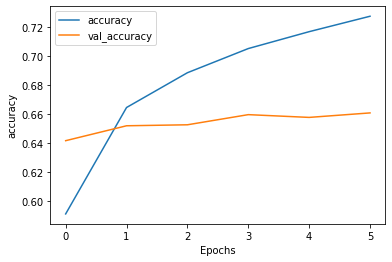

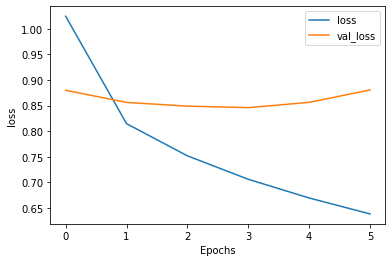

In [33]:
plot_graphs(mdLem, 'accuracy')
plot_graphs(mdLem, 'loss')